In [1]:
import math

In [2]:
import pandas_datareader as web

In [3]:
import numpy as np

In [4]:
import pandas as pd 

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
from keras.models import Sequential

In [7]:
from keras.layers import Dense,LSTM

In [8]:
import matplotlib.pyplot as plt

In [9]:
plt.style.use('fivethirtyeight')

In [10]:
df = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,67.012764
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.183548
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,68.096771


In [11]:
df.shape


(2003, 6)

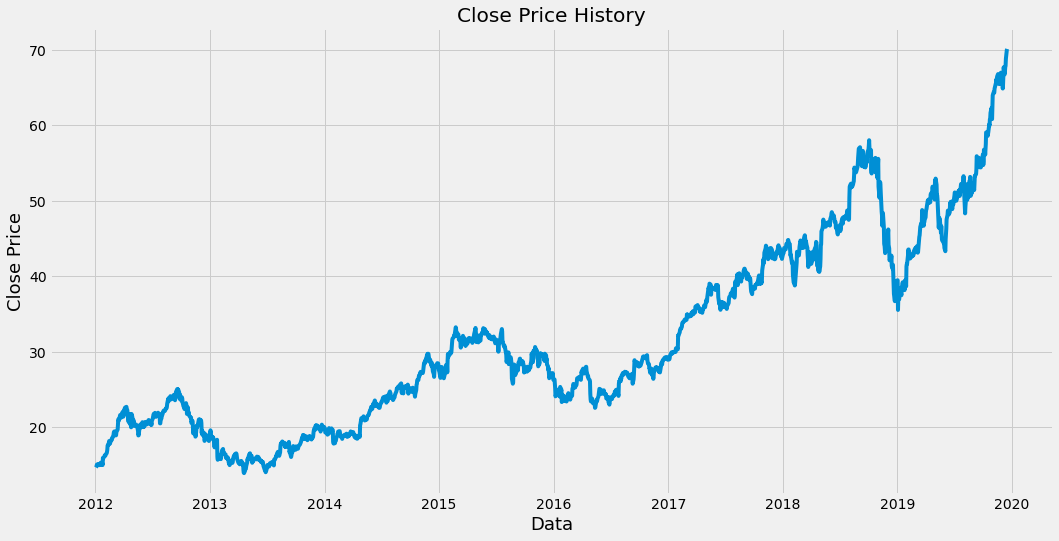

In [12]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [13]:
data = df.filter(['Close'])
dataset=data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len



1603

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [17]:
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []
for i in range(60,training_data_len):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [22]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train.shape[0]


1543

In [24]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1543, 60, 1)

In [53]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [54]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [55]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

1543/1543 [==============================] - 18s 12ms/step - loss: 6.8350e-04


In [56]:
test_data=scaled_data[training_data_len-60: , :]
x_test = []
y_test = dataset[training_data_len:,:]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [57]:
x_test = np.array(x_test)



In [58]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1 ))

In [59]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [60]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

1.0186243629455567

D:\Software\Anaconda\envs\tf\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show(close=None, block=None)>

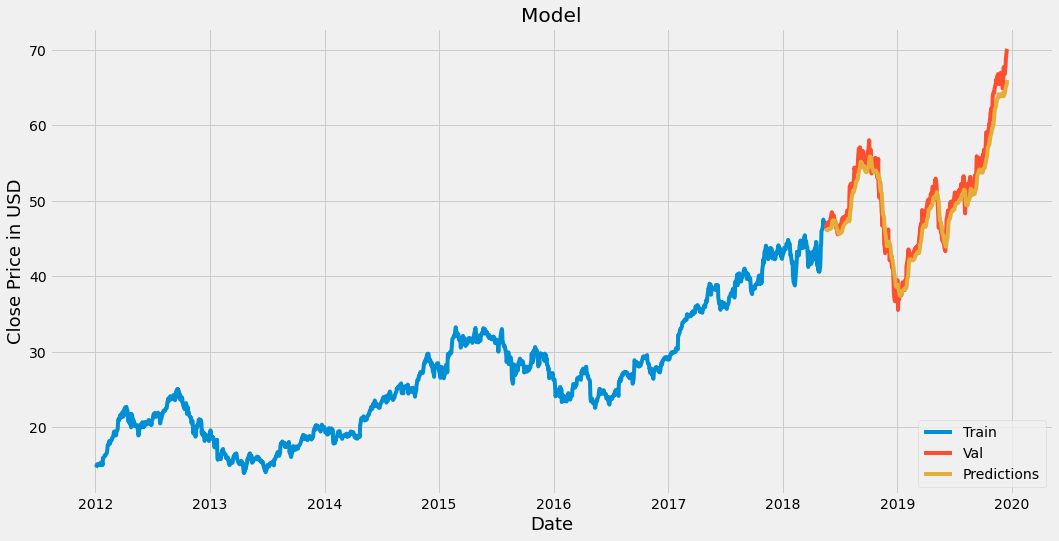

In [61]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price in USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show

In [62]:
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,46.294670
2018-05-18,46.577499,46.248520
2018-05-21,46.907501,46.158966
2018-05-22,46.790001,46.120106
2018-05-23,47.090000,46.093395
...,...,...
2019-12-11,67.692497,64.563026
2019-12-12,67.864998,64.825737
2019-12-13,68.787498,65.088341
